In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


SEED = 12345

## Bernoulli vs geometric coin tosses

### Setting
$X_t \sim B(p)$ for $t\geq 1$

### Rules
* Bernoulli: $Z^B = X_1$ (first round gain),
* Geometric: $Z^G = \frac{X_{\tau}}{\tau} = \frac{1}{\tau}$ where $\tau = \inf\lbrace t\in\mathbb{N}, X_t = 1\rbrace \sim \text{Geom}(p)$ (average gain until first success).

### Expected gain
* Bernoulli: $\mathbb{E}[Z^B] = p$,
* Geometric: $\mathbb{E}[Z^G] = \mathbb{E}[\frac{1}{\tau}] > p$ (Jensen's inequality).

Let $q=1-p$. Then:
$$
\mathbb{E}[\frac{1}{\tau}] = \sum_{k=1}^{+\infty} \frac{\mathbb{P}(\tau=k)}{k} = \sum_{k=1}^{+\infty} \frac{q^{k-1}(1-q)}{k} = \frac{1-q}{q}F(q)\,,
$$
where $F=\int f$ and $f(q)=\sum_{k=0}^{+\infty} q^k = \frac{1}{1-q}$. Therefore:
$$
\mathbb{E}[\frac{1}{\tau}] = -\frac{p}{1-p} \log(p)\,.
$$

In [3]:
M = int(1e4)

rng = np.random.default_rng(SEED)
p = 0.5


def toss(p, rng=np.random.default_rng()):
    return int(rng.random() < p)

In [4]:
def run(p, M, rng=np.random.default_rng()):
    bernoulli = np.empty(M)
    geometric = np.empty(M)

    for m in range(M):
        bernoulli[m] = toss(p, rng=rng)
        x = toss(p, rng=rng)
        count = 1
        while x == 0:
            x = toss(p, rng=rng)
            count += 1
        geometric[m] = x / count
    return bernoulli, geometric

In [5]:
pp = np.linspace(1e-3, 1 - 1e-3, 500)
bernoulli_mean = []
geometric_mean = []

bernoulli_std = []
geometric_std = []

# bernoulli_q_25 = []
# geometric_q_25 = []
# bernoulli_q_75 = []
# geometric_q_75 = []

gap_mean = []
gap_std = []
# gap_q_25 = []
# gap_q_75 = []

for p in tqdm(pp):
    bernoulli, geometric = run(p, M, rng=rng)
    
    bernoulli_mean.append(bernoulli.mean())
    geometric_mean.append(geometric.mean())
    
    bernoulli_std.append(bernoulli.std())
    geometric_std.append(geometric.std())
    
#     bernoulli_q_25.append(np.quantile(bernoulli, 0.25))
#     geometric_q_25.append(np.quantile(geometric, 0.25))
    
#     bernoulli_q_75.append(np.quantile(bernoulli, 0.75))
#     geometric_q_75.append(np.quantile(geometric, 0.75))
    
    gap_mean.append(np.mean(geometric - bernoulli))
    gap_std.append(np.std(geometric - bernoulli))
#     gap_q_25.append(np.quantile(geometric - bernoulli, 0.25))
#     gap_q_75.append(np.quantile(geometric - bernoulli, 0.75))


bernoulli_mean = np.array(bernoulli_mean)
geometric_mean = np.array(geometric_mean)

bernoulli_std = np.array(bernoulli_std)
geometric_std = np.array(geometric_std)

gap_mean = np.array(gap_mean)
gap_std = np.array(gap_std)

  0%|          | 0/500 [00:00<?, ?it/s]

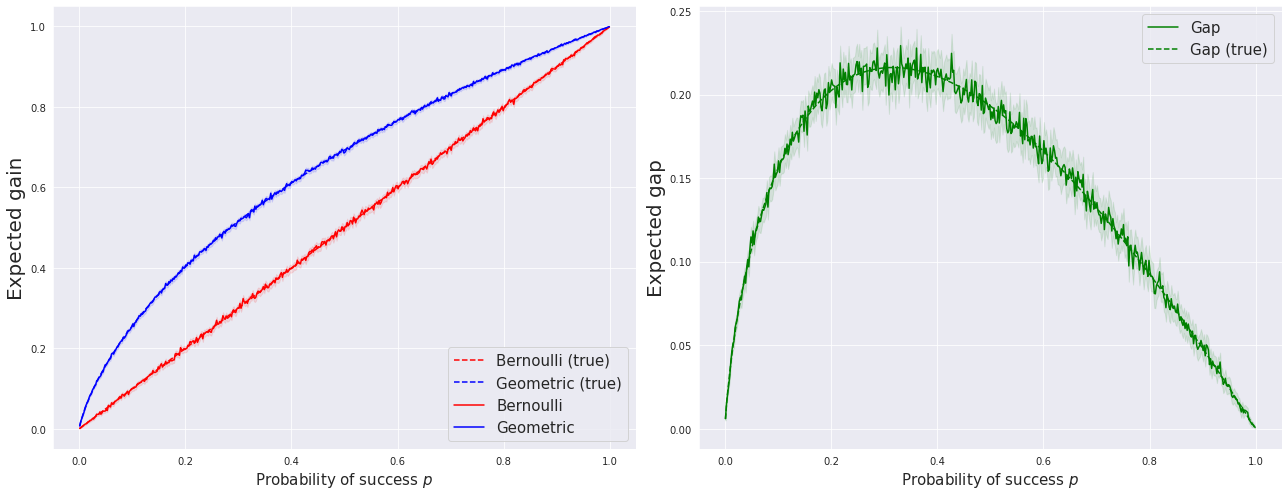

In [6]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.plot(pp, pp, color='red', linestyle='dashed', label='Bernoulli (true)')
    ax.plot(pp, -pp / (1 - pp) * np.log(pp), color='blue', linestyle='dashed', label='Geometric (true)')

    ax.plot(pp, bernoulli_mean, color='red', label='Bernoulli')
    ax.plot(pp, geometric_mean, color='blue', label='Geometric')

    ax.fill_between(pp, bernoulli_mean - bernoulli_std * 1.96 / np.sqrt(M), bernoulli_mean + bernoulli_std * 1.96 / np.sqrt(M), color='red', alpha=0.1)
    ax.fill_between(pp, geometric_mean - geometric_std * 1.96 / np.sqrt(M), geometric_mean + geometric_std * 1.96 / np.sqrt(M), color='blue', alpha=0.1)

#     ax.fill_between(pp, bernoulli_q_25, bernoulli_q_75, color='red', alpha=0.1)
#     ax.fill_between(pp, geometric_q_25, geometric_q_75, color='blue', alpha=0.1)

    ax.legend(loc='lower right', prop={'size': 15})
    ax.set_xlabel('Probability of success $p$', fontsize=15)
    ax.set_ylabel('Expected gain', fontsize=20)
    
    ax = axes[1]
    ax.plot(pp, gap_mean, color='green', label='Gap')
    ax.plot(pp, -pp * (1 / (1 - pp) * np.log(pp) + 1), color='green', linestyle='dashed', label='Gap (true)')
    ax.fill_between(pp, gap_mean - 1.96 * gap_std / np.sqrt(M), gap_mean + 1.96 * gap_std / np.sqrt(M), color='green', alpha=0.1)
#     ax.fill_between(pp, gap_q_25, gap_q_75, color='green', alpha=0.1)

    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('Probability of success $p$', fontsize=15)
    ax.set_ylabel('Expected gap', fontsize=20)
            
    plt.tight_layout()
    plt.show()